#### Description

This code finds optimal number of chromosomes with <b>multiple parents</b> for the GA_2_2 GeneticAlgorithm run method. It also has pop_parents=True.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import time

from GA_2_2 import GeneticAlgorithm

In [2]:
cnn_model_path = '../Models/CNN_6_1_2.keras'
masked_sequence = 'NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN'
max_length = 150
pop_size=200
base_mutation_rate = 0.05
target_expression = 1

run_per_combination = 20
results = []
range_num_parents = range(1, 20, 2)
range_num_chromosomes = [1] + [i for i in range(5, len(masked_sequence)+1, 10)]

In [ ]:
for num_parents in range_num_parents:
    for num_chromosomes in range_num_chromosomes:
        for run_id in range(run_per_combination):
            print(f'num_parents: {num_parents} | num_chromosomes: {num_chromosomes} | Run {run_id + 1} ', end='\r')
            
            ga = GeneticAlgorithm(
                cnn_model_path=cnn_model_path,
                masked_sequence=masked_sequence,
                target_expression=target_expression,
                max_length=max_length,
                pop_size=pop_size,
                generations=100,
                base_mutation_rate=base_mutation_rate,
                precision=0.01,
                chromosomes=num_chromosomes,
                islands=1,
                num_parents=num_parents,
                gene_flow_rate=0.1,
                print_progress=False
            )
            
            # Time the run
            start_time = time.time()
            best_sequence, best_prediction = ga.run()
            end_time = time.time()
            run_time = end_time - start_time
            
            # Record the results
            results.append({
                'num_parents': num_parents,
                'num_chromosomes': num_chromosomes,
                'run_id': run_id + 1,
                'best_sequence': best_sequence,
                'error': abs(best_prediction - target_expression),
                'run_time': run_time
            })
    print()

# Convert results to a DataFrame for analysis
results_df = pd.DataFrame(results)

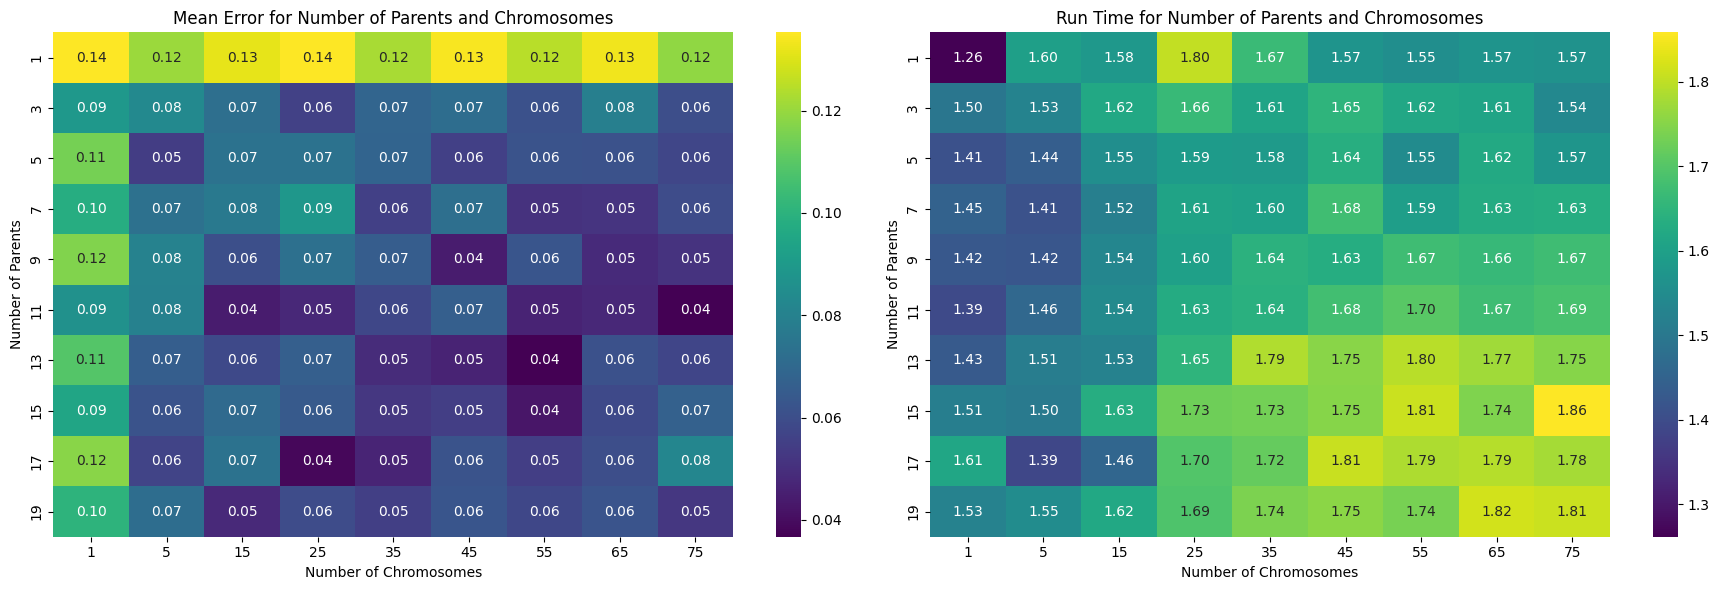

In [ ]:
error_pivot_table = results_df.pivot_table(values='error', index='num_parents', columns='num_chromosomes', aggfunc='mean')
runtime_pivot_table = results_df.pivot_table(values='run_time', index='num_parents', columns='num_chromosomes', aggfunc='mean')
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Heatmap for Mean Error
sns.heatmap(error_pivot_table, annot=True, fmt=".2f", cmap="viridis", ax=axes[0])
axes[0].set_title('Mean Error for Number of Parents and Chromosomes')
axes[0].set_xlabel('Number of Chromosomes')
axes[0].set_ylabel('Number of Parents')

# Heatmap for Run Time
sns.heatmap(runtime_pivot_table, annot=True, fmt=".2f", cmap="viridis", ax=axes[1])
axes[1].set_title('Run Time for Number of Parents and Chromosomes')
axes[1].set_xlabel('Number of Chromosomes')
axes[1].set_ylabel('Number of Parents')

# Adjust layout for better display
plt.tight_layout()
plt.show()


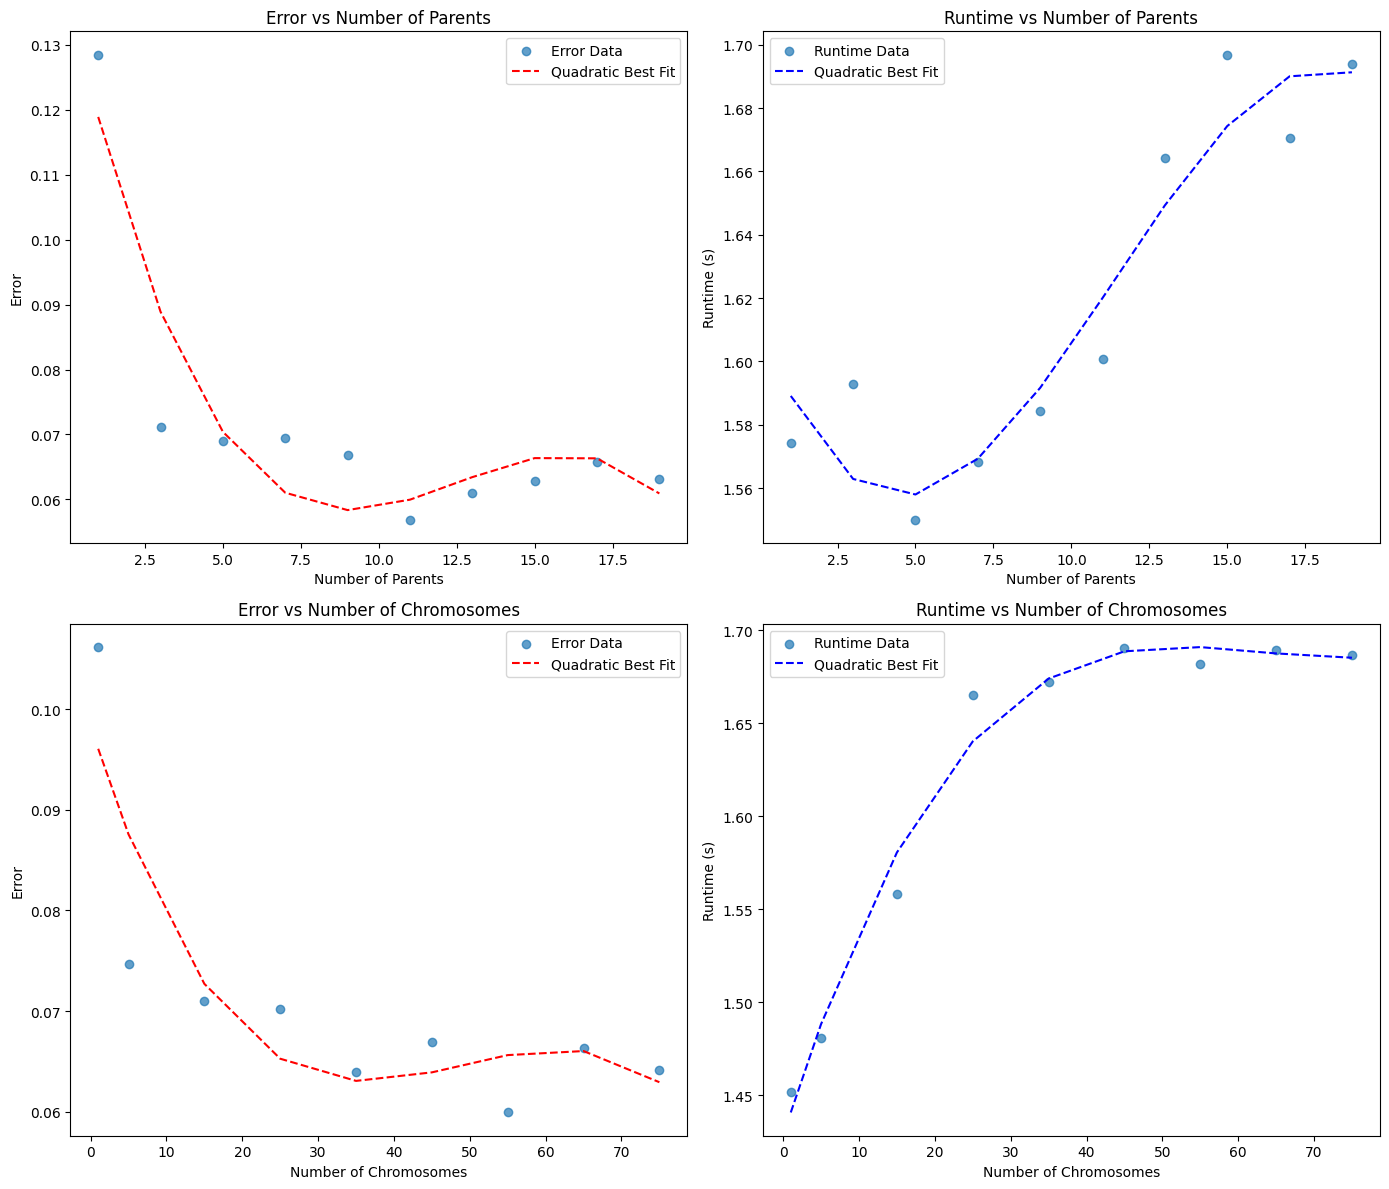

In [ ]:
polynomial_degree = 3

grouped_by_parents = results_df.groupby('num_parents').agg({'error': 'mean', 'run_time': 'mean'}).reset_index()
grouped_by_chromosomes = results_df.groupby('num_chromosomes').agg({'error': 'mean', 'run_time': 'mean'}).reset_index()

# Create the subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Error vs Number of Parents
axes[0, 0].scatter(grouped_by_parents['num_parents'], grouped_by_parents['error'], label='Error Data', alpha=0.7)
z_error_parents = np.polyfit(grouped_by_parents['num_parents'], grouped_by_parents['error'], polynomial_degree)
p_error_parents = np.poly1d(z_error_parents)
axes[0, 0].plot(grouped_by_parents['num_parents'], p_error_parents(grouped_by_parents['num_parents']), color='red', linestyle='--', label='Quadratic Best Fit')
axes[0, 0].set_xlabel('Number of Parents')
axes[0, 0].set_ylabel('Error')
axes[0, 0].set_title('Error vs Number of Parents')
axes[0, 0].legend()

# Runtime vs Number of Parents
axes[0, 1].scatter(grouped_by_parents['num_parents'], grouped_by_parents['run_time'], label='Runtime Data', alpha=0.7)
z_runtime_parents = np.polyfit(grouped_by_parents['num_parents'], grouped_by_parents['run_time'], polynomial_degree)
p_runtime_parents = np.poly1d(z_runtime_parents)
axes[0, 1].plot(grouped_by_parents['num_parents'], p_runtime_parents(grouped_by_parents['num_parents']), color='blue', linestyle='--', label='Quadratic Best Fit')
axes[0, 1].set_xlabel('Number of Parents')
axes[0, 1].set_ylabel('Runtime (s)')
axes[0, 1].set_title('Runtime vs Number of Parents')
axes[0, 1].legend()

# Error vs Number of Chromosomes
axes[1, 0].scatter(grouped_by_chromosomes['num_chromosomes'], grouped_by_chromosomes['error'], label='Error Data', alpha=0.7)
z_error_chromosomes = np.polyfit(grouped_by_chromosomes['num_chromosomes'], grouped_by_chromosomes['error'], polynomial_degree)
p_error_chromosomes = np.poly1d(z_error_chromosomes)
axes[1, 0].plot(grouped_by_chromosomes['num_chromosomes'], p_error_chromosomes(grouped_by_chromosomes['num_chromosomes']), color='red', linestyle='--', label='Quadratic Best Fit')
axes[1, 0].set_xlabel('Number of Chromosomes')
axes[1, 0].set_ylabel('Error')
axes[1, 0].set_title('Error vs Number of Chromosomes')
axes[1, 0].legend()

# Runtime vs Number of Chromosomes
axes[1, 1].scatter(grouped_by_chromosomes['num_chromosomes'], grouped_by_chromosomes['run_time'], label='Runtime Data', alpha=0.7)
z_runtime_chromosomes = np.polyfit(grouped_by_chromosomes['num_chromosomes'], grouped_by_chromosomes['run_time'], polynomial_degree)
p_runtime_chromosomes = np.poly1d(z_runtime_chromosomes)
axes[1, 1].plot(grouped_by_chromosomes['num_chromosomes'], p_runtime_chromosomes(grouped_by_chromosomes['num_chromosomes']), color='blue', linestyle='--', label='Quadratic Best Fit')
axes[1, 1].set_xlabel('Number of Chromosomes')
axes[1, 1].set_ylabel('Runtime (s)')
axes[1, 1].set_title('Runtime vs Number of Chromosomes')
axes[1, 1].legend()

plt.tight_layout()
plt.show()
